In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
df=pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df=df.fillna(method="ffill")

In [4]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     1
YearBuilt        1
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [5]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13579 non-null  float64
 15  YearBuilt      13579 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

(None,
               Rooms         Price      Distance      Postcode      Bedroom2  \
 count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
 mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
 std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
 min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
 25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
 50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
 75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
 max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   
 
            Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
 count  13580.000000  13580.000000   13580.000000  13579.000000  13579.000000   
 mean       1.534242      1.609573     558.416127    150.035168   1964.625967   
 std        0.691712      0.

In [13]:
df['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

Text(0, 0.5, 'Price')

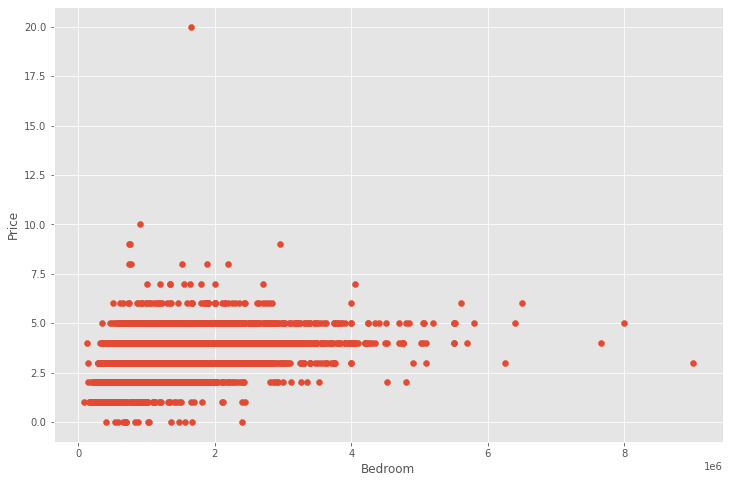

In [15]:
#Visualizing relationships
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(df['Price'], df['Bedroom2'])

plt.xlabel('Bedroom')
plt.ylabel('Price')

<AxesSubplot:>

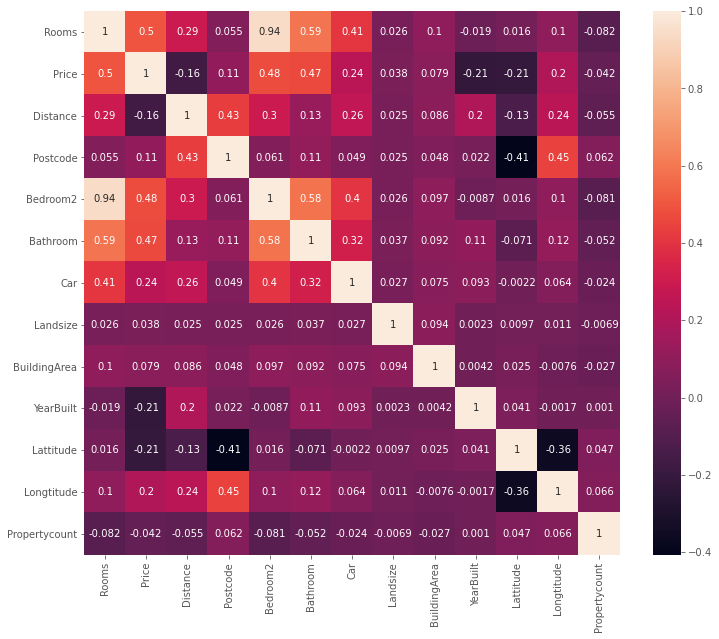

In [17]:
df2=df.corr()
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(df2, annot=True)

In [19]:
y= df.Price                  

In [20]:
df_features = ['Rooms','Distance','Bathroom','Landsize','Lattitude','Longtitude']
x=df[df_features]
x.describe()
x.isna().sum()

Rooms         0
Distance      0
Bathroom      0
Landsize      0
Lattitude     0
Longtitude    0
dtype: int64

In [21]:
#MULTIPLE linear regression model
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()
#fit regression model
model.fit(x, y)
print(model.intercept_, model.coef_, model.score(x, y))


-197962798.554791 [ 3.22751708e+05 -4.28599320e+04  1.82443951e+05  4.47752125e+00
 -1.64418475e+06  9.38493140e+05] 0.47128257420567043


In [22]:
import statsmodels.api as sm
#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())
#create Q-Q plot

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     2016.
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:35:21   Log-Likelihood:            -1.9648e+05
No. Observations:               13580   AIC:                         3.930e+05
Df Residuals:                   13573   BIC:                         3.930e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.98e+08   5.76e+06    -34.378      0.0

In [49]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import preprocessing, svm
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.2)
train_X.shape, val_X.shape, train_y.shape

((10864, 7), (2716, 7), (10864,))

In [50]:
# LINEAR REGRESSION ALGORITHM
mdl3=LinearRegression(normalize=True, fit_intercept=False).fit(train_X,train_y)
print("Training_score : " , mdl3.score(train_X,train_y))
#print(accuracy)
predictors = train_X.columns
predictors


Training_score :  0.4722272525422696


C:\Users\falla\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Index(['const', 'Rooms', 'Distance', 'Bathroom', 'Landsize', 'Lattitude',
       'Longtitude'],
      dtype='object')

In [51]:
coef = pd.Series(mdl3.coef_, predictors).sort_values()

print(coef)

const        -1.992554e+08
Lattitude    -1.641602e+06
Distance     -4.294322e+04
Landsize      4.126505e+00
Bathroom      1.880009e+05
Rooms         3.214901e+05
Longtitude    9.480563e+05
dtype: float64


In [60]:
y_pred = mdl3.predict(test_X)
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': test_y})
df_pred_actual.head(5)

,predicted,actual
4789,1.465341e+06,2460000.0
8942,1.130286e+06,640000.0
7916,6.238871e+05,935000.0
2667,1.023890e+06,910000.0
8128,1.032741e+06,1400000.0


In [62]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(test_y, y_pred))

Testing_score :  0.46717279108693766


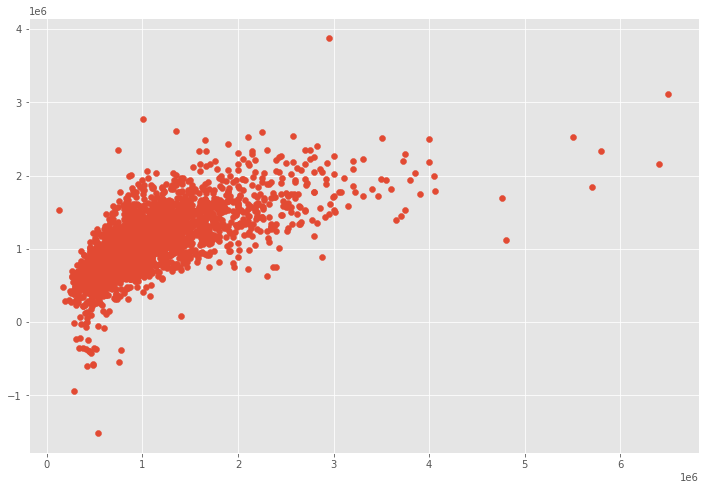

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(test_y, y_pred)
plt.show()

In [66]:
df_sample100= df_pred_actual.sample(100).reset_index()
df_sample100

,index,predicted,actual
0,4107,6.697100e+05,672000.0
1,10534,1.788570e+06,1225000.0
2,9279,1.479707e+06,1400000.0
3,10913,1.012754e+06,1100000.0
4,8897,7.702399e+05,710000.0
...,...,...,...
95,1088,7.962669e+05,1100000.0
96,2881,3.042867e+05,530000.0
97,11725,5.188435e+05,560000.0
98,11472,2.597574e+05,503750.0


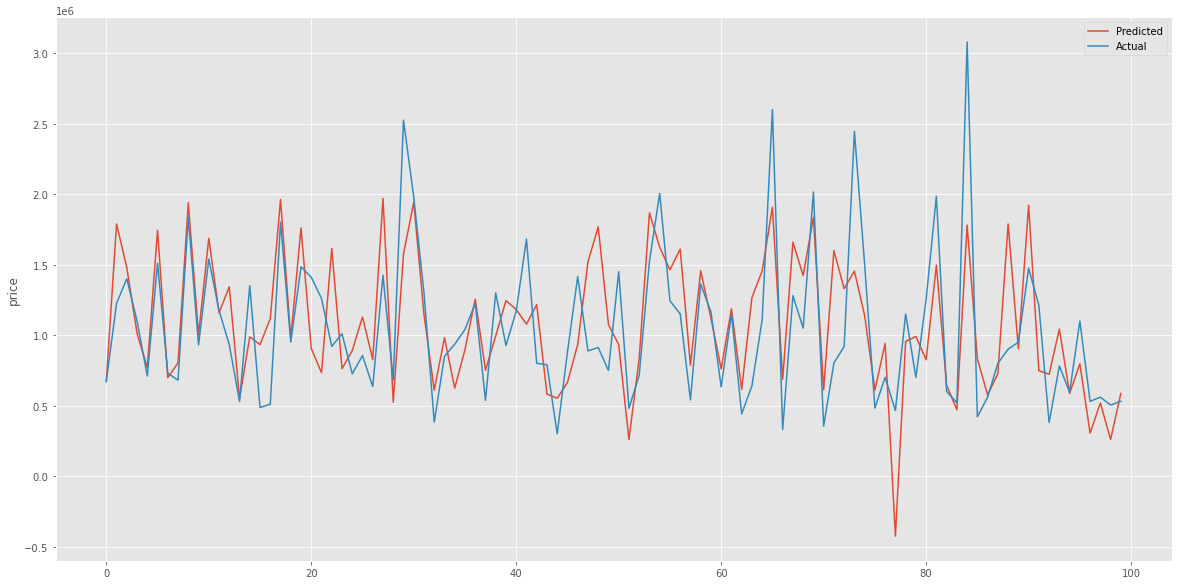

In [67]:
plt.figure(figsize = (20,10))

plt.plot(df_sample100['predicted'], label='Predicted')
plt.plot(df_sample100['actual'], label='Actual')

plt.ylabel('price')

plt.legend()
plt.show()

In [ ]:
# to save time in tain dataset when data set is very huge
import pickle
train_X, val_X, train_y, val_y = train_test_split(x, y, test_size = 0.2)
mdl3=LinearRegression(n_jobs= 1)
mdl3.fit(train_X,train_y)
with open ('linearregression.pickle','wb') as f:
    pickle.dump(mdl3,f)

pickl_in = open('linearregression.pickle','rb')
mdl3= pickle.load(pickl_in)
accuracy = mdl3.score(val_X,val_y)
#print(accuracy)
forecast = mdl3.predict(x)
print(forecast, accuracy)



# build desecion tree model to predict price of bulding


In [12]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
model1.fit(x,y)

DecisionTreeRegressor()

In [15]:
model1.predict(x.head(10))

array([1480000., 1035000., 1465000.,  850000., 1600000.,  941000.,
       1876000., 1636000.,  300000., 1097000.])

# validation of model

In [16]:
from sklearn.metrics import mean_absolute_error

predicted_prices = model1.predict(x)
print('the mean absolute error:',mean_absolute_error(y, predicted_prices ), 'dollars')

the mean absolute error: 1123.707707412862 dollars


In [17]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(x, y, random_state = 0)
# Define model
model2 = DecisionTreeRegressor()
# Fit model
model2.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = model2.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

246234.2240549828


 absolute error for the in-sample data was about 1123 dollars. Out-of-sample it is more than 240,000 dollars.

This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. As a point of reference, the average home value in the validation data is 1.1 million dollars. So the error in new data is about a quarter of the average home value.

In [18]:
from sklearn.tree import export_graphviz

dot_file = 'decision_tree.dot'

export_graphviz(model2, out_file=dot_file, feature_names=train_X.columns.values)

